In [1]:
#numpy and pandas for data manipulation
import numpy as np
import pandas as pd

#sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

In [2]:
samples = pd.read_csv('data/application_train.csv')
train_label = samples['TARGET']
_train_data = samples.drop(columns=['TARGET'])

In [3]:
len(samples[_train_data['CODE_GENDER'] != 'XNA'])

307507

In [4]:
len(samples[_train_data["DAYS_EMPLOYED"] == 365243])

55374

In [5]:
samples[_train_data["DAYS_EMPLOYED"] == 365243]['TARGET'].sum()

2990

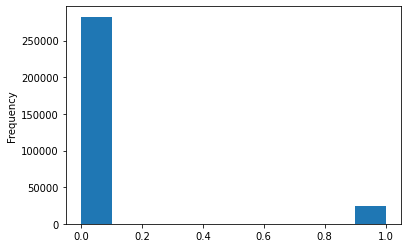

In [7]:
train_label.astype(int).plot.hist();

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values = missing_values_table(_train_data)


Your selected dataframe has 121 columns.
There are 67 columns that have missing values.


In [66]:
missing_values.head(20)

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [23]:
missing_values.axes[0].tolist()

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION

In [26]:
correlations = samples.corr()

In [53]:
m = ~(correlations.mask(np.eye(len(correlations), dtype=bool)).abs() > 0.8).any()
tmp = pd.DataFrame({'Name':m.index, 'Correlated':m.values})
tmp[tmp['Correlated']]

,Name,Correlated
0,SK_ID_CURR,True
1,TARGET,True
3,AMT_INCOME_TOTAL,True
5,AMT_ANNUITY,True
7,REGION_POPULATION_RELATIVE,True
8,DAYS_BIRTH,True
10,DAYS_REGISTRATION,True
11,DAYS_ID_PUBLISH,True
12,OWN_CAR_AGE,True
13,FLAG_MOBIL,True


In [94]:
c = correlations.abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so.iloc[100:140]

EXT_SOURCE_3                  EXT_SOURCE_3                    1.000000
EXT_SOURCE_2                  EXT_SOURCE_2                    1.000000
EXT_SOURCE_1                  EXT_SOURCE_1                    1.000000
LIVE_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY         1.000000
AMT_REQ_CREDIT_BUREAU_MON     AMT_REQ_CREDIT_BUREAU_MON       1.000000
SK_ID_CURR                    SK_ID_CURR                      1.000000
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999755
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999755
YEARS_BUILD_MEDI              YEARS_BUILD_AVG                 0.998495
YEARS_BUILD_AVG               YEARS_BUILD_MEDI                0.998495
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998490
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998490
FLOORSMIN_AVG                 FLOORSMIN_MEDI                  0.997241
FLOORSMIN_MEDI                FLOORSMIN_AVG                   0.997241
FLOORS

In [65]:
tmp = pd.DataFrame({'Name':m.index, 'Correlated':m.values})
tmp[tmp['Correlated']]

SK_ID_CURR                   -0.001337
TARGET                        0.045982
CNT_CHILDREN                  0.240714
AMT_INCOME_TOTAL              0.063994
AMT_CREDIT                    0.065519
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.000438
AMT_REQ_CREDIT_BUREAU_WEEK   -0.003028
AMT_REQ_CREDIT_BUREAU_MON     0.034092
AMT_REQ_CREDIT_BUREAU_QRT    -0.015271
AMT_REQ_CREDIT_BUREAU_YEAR   -0.049949
Name: FLAG_EMP_PHONE, Length: 106, dtype: float64

In [102]:
correlations['FLAG_EMP_PHONE']['TARGET']

0.04598221971656028

In [103]:
correlations['DAYS_EMPLOYED']['TARGET']

-0.04493166265791809

In [113]:
# Select upper triangle of correlation matrix
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

In [114]:
to_drop

['APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [115]:
correlations['TARGET'][to_drop]

APARTMENTS_MEDI                -0.029184
BASEMENTAREA_MEDI              -0.022081
YEARS_BEGINEXPLUATATION_MEDI   -0.009993
YEARS_BUILD_MEDI               -0.022326
COMMONAREA_MEDI                -0.018573
ELEVATORS_MEDI                 -0.033863
ENTRANCES_MEDI                 -0.019025
FLOORSMAX_MEDI                 -0.043768
FLOORSMIN_MEDI                 -0.033394
LANDAREA_MEDI                  -0.011256
LIVINGAPARTMENTS_MEDI          -0.024621
LIVINGAREA_MEDI                -0.032739
NONLIVINGAPARTMENTS_MEDI       -0.002757
NONLIVINGAREA_MEDI             -0.013337
OBS_60_CNT_SOCIAL_CIRCLE        0.009022
Name: TARGET, dtype: float64